In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing
from sklearn.metrics import accuracy_score

from mlgrad.funcs import Exp, Hinge, Hinge2, Sigmoidal
import mlgrad.plots as plots
from sys import float_info

from math import sqrt

In [2]:
from mlgrad.cls import MarginMaximization

In [3]:
X, Y = datasets.load_wine(return_X_y=True)

In [4]:
X = preprocessing.scale(X)

In [5]:
X2 = X[Y != 0]
Y2 = Y[Y != 0]
np.putmask(Y2, Y2 == 1, -1)
np.putmask(Y2, Y2 == 2, +1)
Y2 = Y2.astype('d')
N = len(Y2)

In [18]:
mm = MarginMaximization(Hinge(1.0), h=0.1, tol=1.0e-8, n_iter=5000)

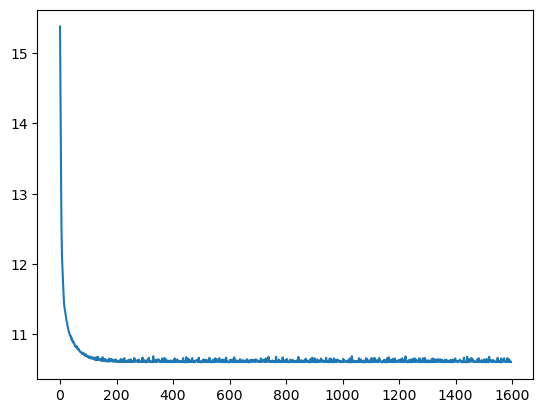

1595
[ 0.279  0.224  0.272  0.077  0.060  0.001 -0.499 -0.006 -0.210  0.461
 -0.396 -0.355  0.023] [-0.302  0.313 -0.059  0.416 -0.183 -0.542 -0.662  0.366 -0.376  0.167
 -0.456 -0.596 -0.536]


In [19]:
mm.fit(X2, Y2)
plt.plot(mm.lvals)
plt.show()
print(mm.K)
print(mm.w, mm.c)

In [20]:
accuracy_score(Y2, np.sign(mm.evaluate(X2)))

0.9915966386554622

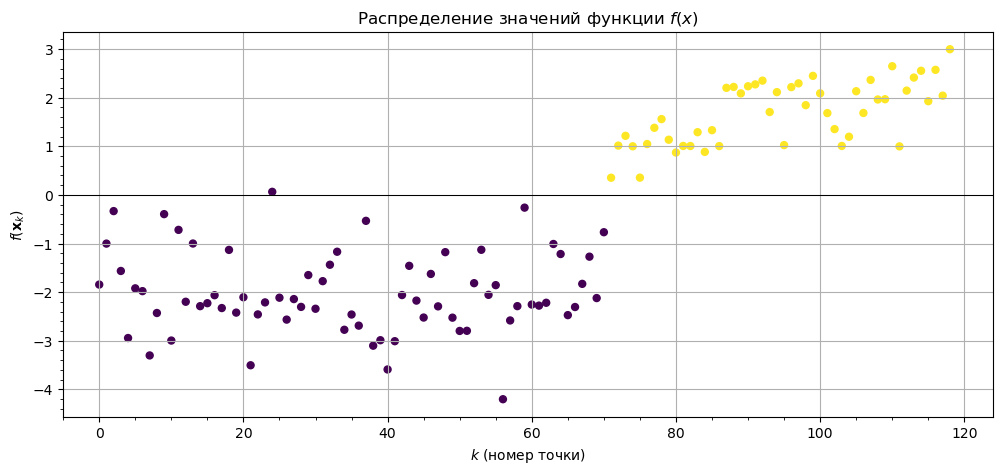

In [21]:
plt.figure(figsize=(12,5))
plots.plot_cls_function(mm, X2, Y2)
plt.show()

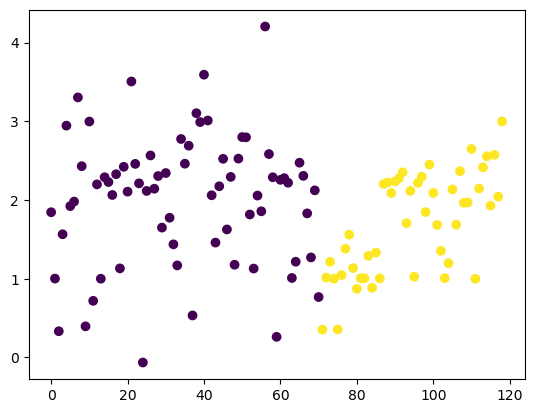

In [22]:
plt.scatter(range(len(Y2)), Y2 * mm.evaluate(X2), c=Y2)
plt.show()

In [23]:
X2_1 = X2 - mm.c
X2_1 -= np.outer(X2_1 @ mm.w, mm.w)

In [24]:
mm1 = MarginMaximization(Hinge(1.0), h=0.02, tol=1.0e-8, n_iter=5000)

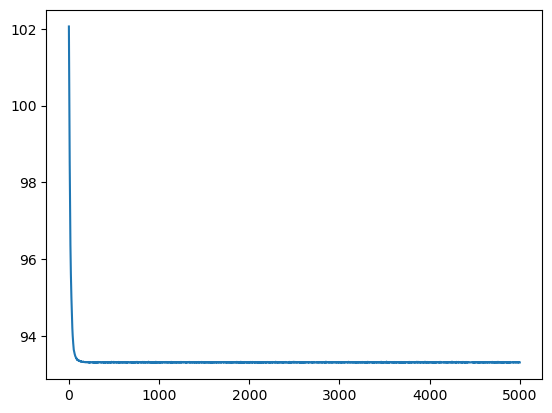

4999
[ 0.084  0.194 -0.157  0.069  0.076 -0.615  0.527  0.323 -0.046  0.196
 -0.155 -0.182  0.249] [-0.008 -0.029  0.024 -0.009 -0.011  0.071 -0.058 -0.045 -0.003 -0.026
  0.018  0.019 -0.026]


In [25]:
mm1.fit(X2_1, Y2)
plt.plot(mm1.lvals)
plt.show()
print(mm1.K)
print(mm1.w, mm1.c)

In [26]:
accuracy_score(Y2, np.sign(mm.evaluate(X2_1)))

0.5966386554621849

In [27]:
U1 = (X2 - mm.c) @ mm.w
U2 = (X2 - mm.c) @ mm1.w

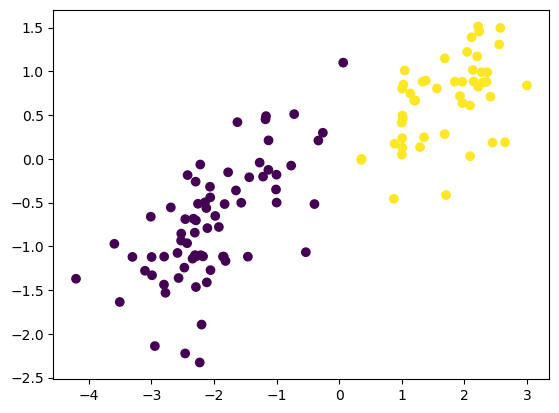

In [28]:
plt.scatter(U1, U2, c=Y2)